In [2]:
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import keras

from sklearn.model_selection import train_test_split
import sys
import numpy

In [5]:
with open('libros.json') as file:
    libros = json.load(file)
with open('teclados.json') as file:
    teclados = json.load(file)   
with open('mochilas.json') as file:
    mochilas = json.load(file)    
 
for item in libros:
        item['title'] = 'Libro'   
for item in teclados:
        item['title'] = 'Teclado'
for item in mochilas:
        item['title'] = 'Mochila'    
        
cleaned_libros = []
for item in libros:
    medium_images = [image["medium"] for image in item["images"]]
    cleaned_item = {
        "id": item["id"],
        "title": "Libros",
        "imagen": medium_images
    }
    cleaned_libros.append(cleaned_item)
cleaned_teclados = []
for item in teclados:
    medium_images = [image["medium"] for image in item["images"]]
    cleaned_item = {
        "id": item["id"],
        "title": "Teclados",
        "imagen": medium_images
    }
    cleaned_teclados.append(cleaned_item)
cleaned_mochilas = []
for item in mochilas:
    medium_images = [image["medium"] for image in item["images"]]
    cleaned_item = {
        "id": item["id"],
        "title": "Mochilas",
        "imagen": medium_images
    }
    cleaned_mochilas.append(cleaned_item)
            
                          
df_libros=pd.DataFrame(cleaned_libros)
df_teclados=pd.DataFrame(cleaned_teclados)
df_mochilas=pd.DataFrame(cleaned_mochilas)

#df_libros['title']=df_libros['title'].apply(lambda x: [object for object in x if object in relevant_objects])

df = pd.DataFrame(cleaned_libros + cleaned_mochilas + cleaned_teclados)
#df= df[['']]
relevant_objects = ['Libro', 'Teclado', 'Mochila']
#df['title'] = df['title'].apply(lambda x: [object for object in x if object in relevant_objects])

df_libros['imagen'] = df_libros['imagen'].str[0].astype(str)
df_mochilas['imagen'] = df_mochilas['imagen'].str[0].astype(str)
df_teclados['imagen'] = df_teclados['imagen'].str[0].astype(str)
df['imagen'] = df['imagen'].str[0].astype(str)


pd.set_option('max_colwidth', 100)
with pd.option_context('display.max_colwidth', 100):
    print (df)
 
 

                id     title  \
0     mzn81mgq52zn    Libros   
1     e65gk2m48gjo    Libros   
2     qzmyx19w7gzv    Libros   
3     0j232kwk3r6y    Libros   
4     qjwp59xom4zo    Libros   
...            ...       ...   
1075  wzvne24vrdjl  Teclados   
1076  wzy5prkk1pj5  Teclados   
1077  0j232n84qm6y  Teclados   
1078  0j2328xonr6y  Teclados   
1079  pzprorngk963  Teclados   

                                                                                                imagen  
0     https://cdn.wallapop.com/images/10420/et/ch/__/c10420p895818149/i3254482064.jpg?pictureSize=W640  
1     https://cdn.wallapop.com/images/10420/et/ca/__/c10420p895808572/i3254430770.jpg?pictureSize=W640  
2     https://cdn.wallapop.com/images/10420/et/ch/__/c10420p895817256/i3254478465.jpg?pictureSize=W640  
3     https://cdn.wallapop.com/images/10420/et/cg/__/c10420p895816035/i3254473454.jpg?pictureSize=W640  
4     https://cdn.wallapop.com/images/10420/et/bn/__/c10420p895779629/i3254277504.jpg?pict

In [6]:
df_teclados   

,id,title,imagen
0,vjrr2xo5e8jk,Teclados,https://cdn.wallapop.com/images/10420/et/7h/__/c10420p895583967/i3252968823.jpg?pictureSize=W640
1,0j232exove6y,Teclados,https://cdn.wallapop.com/images/10420/et/ae/__/c10420p895720211/i3253943201.jpg?pictureSize=W640
2,pj95peppqkze,Teclados,https://cdn.wallapop.com/images/10420/et/9u/__/c10420p895694113/i3253759284.jpg?pictureSize=W640
3,pj95pel3x0ze,Teclados,https://cdn.wallapop.com/images/10420/et/9b/__/c10420p895669837/i3253443534.jpg?pictureSize=W640
4,nz00od8exvzo,Teclados,https://cdn.wallapop.com/images/10420/et/6w/__/c10420p895557603/i3252830682.jpg?pictureSize=W640
...,...,...,...
355,wzvne24vrdjl,Teclados,https://cdn.wallapop.com/images/10420/es/e2/__/c10420p894212389/i3248818847.jpg?pictureSize=W640
356,wzy5prkk1pj5,Teclados,https://cdn.wallapop.com/images/10420/es/b7/__/c10420p894078568/i3245740250.jpg?pictureSize=W640
357,0j232n84qm6y,Teclados,https://cdn.wallapop.com/images/10420/es/ea/__/c10420p894222383/i3246509455.jpg?pictureSize=W640
358,0j2328xonr6y,Teclados,https://cdn.wallapop.com/images/10420/es/at/__/c10420p894061035/i3245655570.jpg?pictureSize=W640


In [9]:
df_libros

,id,title,imagen
0,mzn81mgq52zn,Libros,https://cdn.wallapop.com/images/10420/et/ch/__/c10420p895818149/i3254482064.jpg?pictureSize=W640
1,e65gk2m48gjo,Libros,https://cdn.wallapop.com/images/10420/et/ca/__/c10420p895808572/i3254430770.jpg?pictureSize=W640
2,qzmyx19w7gzv,Libros,https://cdn.wallapop.com/images/10420/et/ch/__/c10420p895817256/i3254478465.jpg?pictureSize=W640
3,0j232kwk3r6y,Libros,https://cdn.wallapop.com/images/10420/et/cg/__/c10420p895816035/i3254473454.jpg?pictureSize=W640
4,qjwp59xom4zo,Libros,https://cdn.wallapop.com/images/10420/et/bn/__/c10420p895779629/i3254277504.jpg?pictureSize=W640
...,...,...,...
355,3zl1w51d8qjx,Libros,https://cdn.wallapop.com/images/10420/et/67/__/c10420p895524621/i3252642562.jpg?pictureSize=W640
356,8j3edge2glz9,Libros,https://cdn.wallapop.com/images/10420/et/67/__/c10420p895524758/i3252643311.jpg?pictureSize=W640
357,e65gk2vg52jo,Libros,https://cdn.wallapop.com/images/10420/et/cc/__/c10420p895811700/i3254454610.jpg?pictureSize=W640
358,9jd29v2re46k,Libros,https://cdn.wallapop.com/images/10420/et/69/__/c10420p895527012/i3252656162.jpg?pictureSize=W640


In [7]:
import os
import requests

#Pedimos todas las imagenes desde las URL
if not os.path.exists('images'):
    os.makedirs('images')
if not os.path.exists('images/Libros'):
    os.makedirs('images/Libros')    
if not os.path.exists('images/Mochilas'):
    os.makedirs('images/Mochilas') 
if not os.path.exists('images/Teclados'):
    os.makedirs('images/Teclados') 

for i, url in enumerate(df_libros['imagen']):   
    response = requests.get(url)
    with open(f'images/libros/libro_{i}.jpeg', 'wb') as f:
        f.write(response.content)
        
for i, url in enumerate(df_teclados['imagen']):
    response = requests.get(url)
    with open(f'images/teclados/teclado_{i}.jpeg', 'wb') as f:
        f.write(response.content)    
        
for i, url in enumerate(df_mochilas['imagen']):
    response = requests.get(url)
    with open(f'images/mochilas/mochila_{i}.jpeg', 'wb') as f:
        f.write(response.content)            

In [3]:
import os
#Borramos imagenes corruptas
num_skipped = 0
for folder_name in ("Libros", "Mochilas", "Teclados"):
    folder_path = os.path.join("images", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [4]:
image_size = (180, 180)
batch_size = 128
directory = "images"

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1075 files belonging to 3 classes.
Using 860 files for training.
Using 215 files for validation.


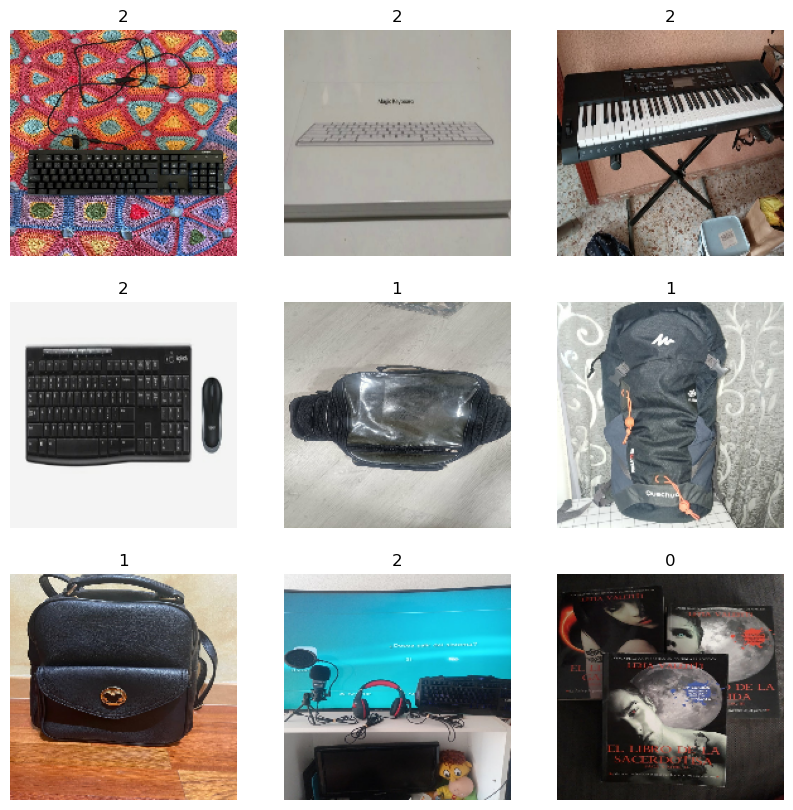

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [6]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

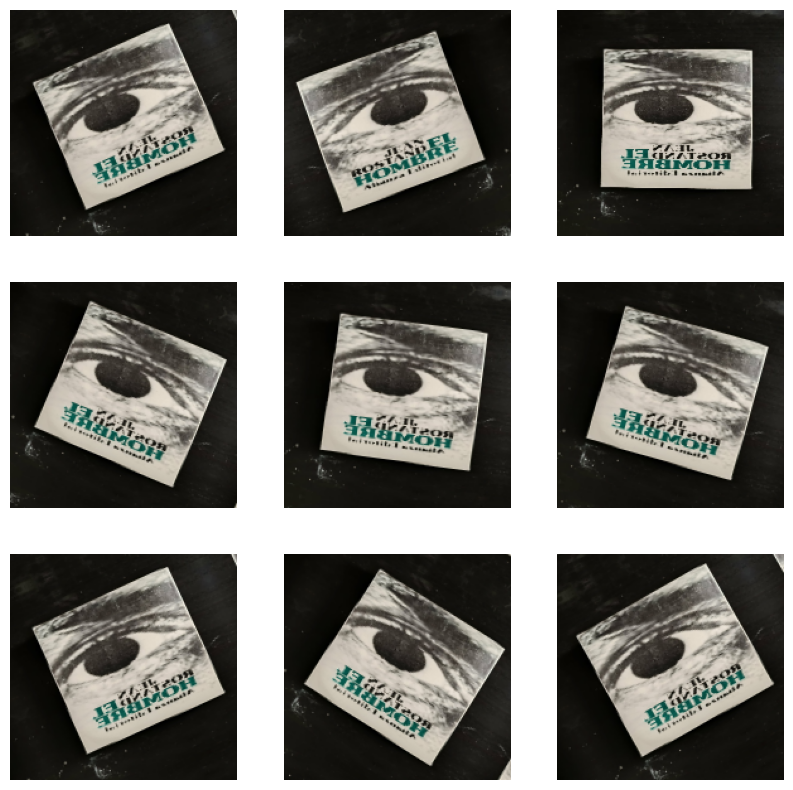

In [7]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [8]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [9]:

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 3:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=3)
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/25
7/7 [==============================] - 170s 23s/step - loss: -0.3233 - accuracy: 0.4349 - val_loss: 0.6027 - val_accuracy: 0.3535
Epoch 2/25
7/7 [==============================] - 157s 22s/step - loss: -2.4490 - accuracy: 0.4640 - val_loss: 0.4802 - val_accuracy: 0.3535
Epoch 3/25
7/7 [==============================] - 153s 21s/step - loss: -4.6198 - accuracy: 0.4360 - val_loss: 0.3427 - val_accuracy: 0.3535
Epoch 4/25
7/7 [==============================] - 165s 23s/step - loss: -6.7010 - accuracy: 0.4547 - val_loss: 0.1999 - val_accuracy: 0.3535
Epoch 5/25
7/7 [==============================] - 148s 21s/step - loss: -8.1187 - accuracy: 0.4756 - val_loss: 0.1372 - val_accuracy: 0.3535
Epoch 6/25
7/7 [==============================] - 150s 21s/step - loss: -9.6491 - accuracy: 0.4453 - val_loss: 0.1236 - val_accuracy: 0.3535
Epoch 7/25
7/7 [==============================] - 141s 20s/step - loss: -11.8529 - accuracy: 0.4488 - val_loss: 0.1389 - val_accuracy: 0.3535
Epoch 8/25
7

In [11]:
from tensorflow.keras.preprocessing import image

img = image.load_img(
    "images/Libros/libro_187.jpeg", target_size=image_size
)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
class_probabilities = predictions[0]

class_names = ['Libro', 'Mochila', 'Teclado']
predicted_class = class_names[np.argmax(class_probabilities)]

print(f"Predicted class: {predicted_class}")
print("Probabilities:")
for class_name, probability in zip(class_names, class_probabilities):
    print(f"{class_name}: {probability * 100:.2f}%")
#62.93% de certidumbre de que es un libro con 2 epochs
#76.80% de certidumbre de que es un libro con 25 epochs

1/1 [==============================] - 0s 343ms/step
Predicted class: Libro
Probabilities:
Libro: 76.80%


In [12]:
loss, accuracy = model.evaluate(val_ds)

print(f"Test loss: {round(loss, 2)}")
print(f"Test accuracy: {round(accuracy * 100, 2)}%")
#35% accuracy con 2 epochs
#35% accuracy con 25 epochs?

2/2 [==============================] - 7s 3s/step - loss: 0.2761 - accuracy: 0.3535
Test loss: 0.28
Test accuracy: 35.35%


[]
